# Lab session 8: Perceptron (single layer) 
__Name: Anthra Devarajan<br>
Registration number: 19BCE1681<br>
Course code: CSE4020<br>
Faculty: Dr. Abdul Quadir<br>
Slot: L31 + L32<br>
Date: 4-October-2021 Monday__<br><br>
    
Instructions:<br>
Make a single layer perceptron from scratch and use the Iris dataset to train a model. Verify the model's results and compare the performance using the buil-in single layer percepton from Sklearn package

## I) Single layer Perceptron (built from scratch)

__1) Import Libraries__

Import the necessary packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.metrics import confusion_matrix

__2) Dataset__

Load the Iris dataset using the URL 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

In [3]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)
data = data[:100] 
# The dataset contains three species of Iris flowers, but with single layer perceptron we can do binary classification
# I am implementing the perceptron for two species and thus, only the first 100 entries consisting of Iris setosa and Iris versicolor 
data[4] = np.where(data.iloc[:, -1]=='Iris-setosa', 0, 1)
data = np.asmatrix(data, dtype = 'float64')

__3) Visualisation__

Sepal length vs petal length

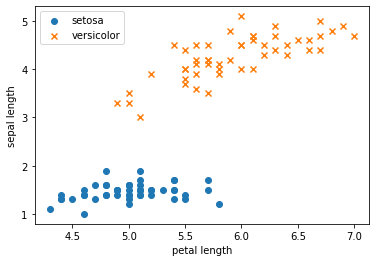

In [4]:
plt.scatter(np.array(data[:50,0]), np.array(data[:50,2]), marker='o', label='setosa')
plt.scatter(np.array(data[50:,0]), np.array(data[50:,2]), marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend()
plt.show()

__4) Build a function - single layer perceptron__

In [5]:
def accuracy(a, p):
    correct=0
    for i in range(len(y)):
        if(a[i]==p[i]):
            crct+=1
    return correct/len(a)

In [6]:
def perceptron(data, num_iter):
    misclassified_ = [] 
    features = data[:, :-1]
    labels = data[:, -1]
    w = np.zeros(shape=(1, features.shape[1]+1))
    predicted = []
  
    for epoch in range(num_iter):
        misclassified = 0
        predicted_epoch = []
        for x, label in zip(features, labels):
            x = np.insert(x,0,1)
            y = np.dot(w, x.transpose())
            if (y > 0):
                target = 1.0 
            else:
                target = 0.0
            
            delta = (label.item(0,0) - target)
            predicted_epoch.append(target)
            if(delta):
                misclassified += 1
                w += (delta * x)
        
        misclassified_.append(misclassified)
        predicted.append(predicted_epoch)
    return (w, misclassified_, predicted)

invoke the function to get weights, correct classifications, incorrect classifications for a total of 10 epochs

In [7]:
max_iterations = 10 
w, misclassified_, prediction = perceptron(data, max_iterations)

__5) Visualise the performace of the model at each epoch__

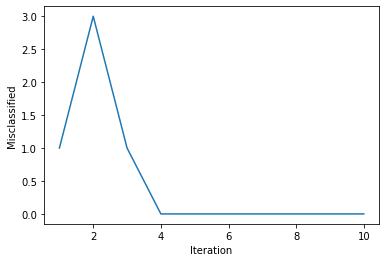

In [35]:
epochs = np.arange(1, max_iterations+1)
plt.plot(epochs, misclassified_)
plt.xlabel('Iteration')
plt.ylabel('Misclassified')
plt.show()

By the 4th epoch, the model did not miscassify any species of flower and therefore the curve is saturated (flat)

__6) The model weights - coefficients:__

In [36]:
print("The weights are :")
for i in range(len(w[0])):
    print("Coefficient " + str(i) + " = " + str(w[0][i]))

The weights are :
Coefficient 0 = -1.0
Coefficient 1 = -1.0999999999999996
Coefficient 2 = -3.5999999999999996
Coefficient 3 = 5.200000000000001
Coefficient 4 = 2.1999999999999997


__7) Performace__

Using a confusion matrix show the performance of the results of the best epochs - from 3

In [46]:
expected_d = data[:, -1]
expected = []
for i in range(len(expected_d)):
    expected.append(int(expected_d[i]))

In [47]:
def confusion_matrix(predicted, actual):
    confusion = [[0,0],[0,0]]
    for i in range(len(predicted)):
        if predicted[i] == actual[i]:
            if predicted[i] == 0:
                confusion[1][1]+=1
            else:
                confusion[0][0]+=1
        else:
            if predicted[i] == 0:
                confusion[0][1]+=1
            else:
                confusion[1][0]+=1
    return confusion

Confusion matrix (epoch wise): 

Epoch 1) Confusion matrix:
[[49, 1], [0, 50]]


Epoch 2) Confusion matrix:
[[49, 1], [2, 48]]


Epoch 3) Confusion matrix:
[[50, 0], [1, 49]]


Epoch 4) Confusion matrix:
[[50, 0], [0, 50]]


Epoch 5) Confusion matrix:
[[50, 0], [0, 50]]


Epoch 6) Confusion matrix:
[[50, 0], [0, 50]]


Epoch 7) Confusion matrix:
[[50, 0], [0, 50]]


Epoch 8) Confusion matrix:
[[50, 0], [0, 50]]


Epoch 9) Confusion matrix:
[[50, 0], [0, 50]]


Epoch 10) Confusion matrix:
[[50, 0], [0, 50]]




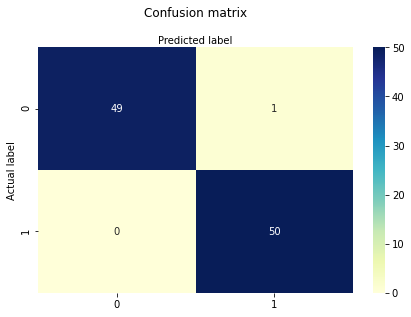

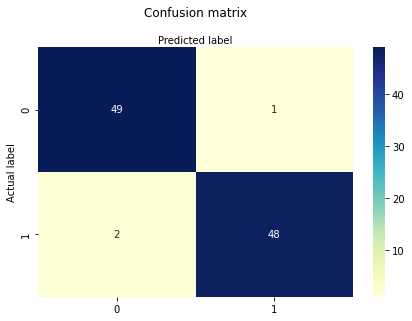

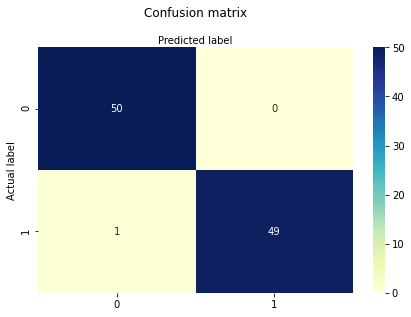

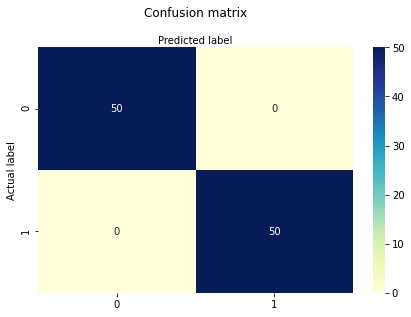

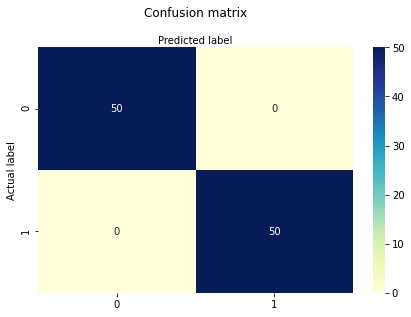

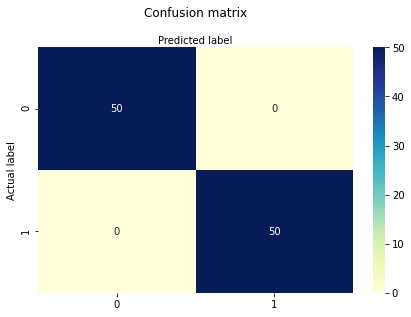

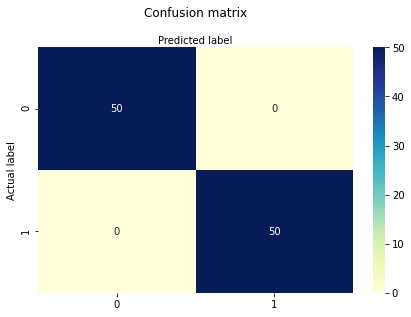

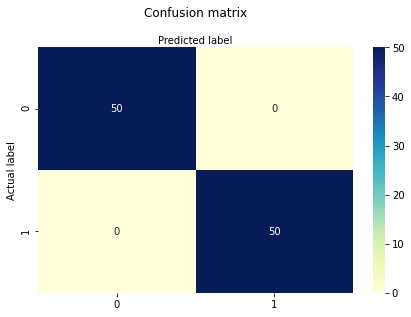

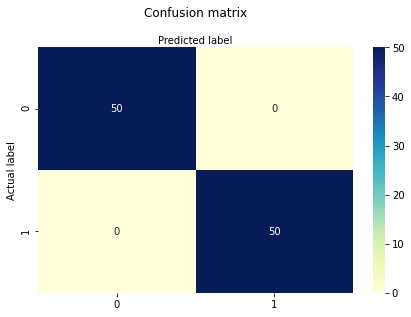

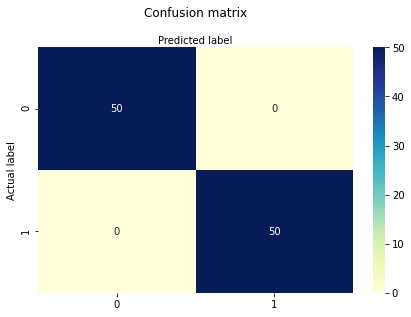

In [50]:
for i in range(max_iterations):
    epoch_wise_predicted = prediction[i]
    confusion = confusion_matrix(list(epoch_wise_predicted), list(expected))
    print("Epoch " + str(i + 1) + ") Confusion matrix:")
    print(confusion, end="\n")
    class_names=["Iris-setosa","Iris-versicolor"] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    
    # create heatmap
    sb.heatmap(pd.DataFrame(np.array(confusion)), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    print("\n")

Accuracy:

In [49]:
for i in range(max_iterations):
    predicted = prediction[i]
    print("Epoch " + str(i+1)+ "    Accuracy = " + str(accuracy(predicted, expected)))

Epoch 1    Accuracy = 0.99
Epoch 2    Accuracy = 0.97
Epoch 3    Accuracy = 0.99
Epoch 4    Accuracy = 1.0
Epoch 5    Accuracy = 1.0
Epoch 6    Accuracy = 1.0
Epoch 7    Accuracy = 1.0
Epoch 8    Accuracy = 1.0
Epoch 9    Accuracy = 1.0
Epoch 10    Accuracy = 1.0


<hr>

## II) Perceptron using sklearn

__1) Libraries__

In [41]:
from sklearn.linear_model import Perceptron

__2) Training the model__

In [42]:
X = data[:, :-1]
y = data[:, -1]
model = Perceptron(random_state=1)
model.fit(X, np.array(y))

/Users/srinivasanperumal/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Perceptron(random_state=1)

__3) Prediction__

In [43]:
predicted = model.predict(X)

__4) Performance__

In [44]:
results = confusion_matrix(y, predicted)
expected = []
for i in range(len(y)):
    expected.append(int(y[i]))
print(results)

[[50  0]
 [ 0 50]]


In [45]:
print("Accuracy = " + str(accuracy(predicted, expected)))

Accuracy = 1.0


<hr>